# Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

### Part 1

The `food_consumption.csv` dataset from the `data` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [5]:
food = pd.read_csv("data/food_consumption.csv")
print(food.head())

     country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [32]:
highestmedian = { "food category": "", "value": 0 }

for foodcat in food["food_category"].unique():
	print(foodcat)
	filtered = food[food["food_category"] == foodcat]["consumption"]
	median = np.median(filtered)
	if median > highestmedian["value"]:
		highestmedian["food category"] = foodcat
		highestmedian["value"] = median
	print("median", median)
	print(filtered.describe())

print("highest median in consumption:", highestmedian)

pork
median 10.355
count    130.000000
mean      16.123692
std       15.717646
min        0.000000
25%        2.090000
50%       10.355000
75%       28.227500
max       67.110000
Name: consumption, dtype: float64
poultry
median 19.855
count    130.000000
mean      21.219231
std       14.571980
min        0.470000
25%       10.910000
50%       19.855000
75%       29.747500
max       62.500000
Name: consumption, dtype: float64
beef
median 8.285
count    130.000000
mean      12.123385
std        9.654140
min        0.780000
25%        4.997500
50%        8.285000
75%       17.940000
max       55.480000
Name: consumption, dtype: float64
lamb_goat
median 1.3250000000000002
count    130.000000
mean       2.600154
std        3.665252
min        0.000000
25%        0.560000
50%        1.325000
75%        3.102500
max       21.120000
Name: consumption, dtype: float64
fish
median 13.95
count    130.000000
mean      17.287077
std       19.013508
min        0.240000
25%        6.025000
50%       1

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<Axes: xlabel='food_category', ylabel='co2_emission'>

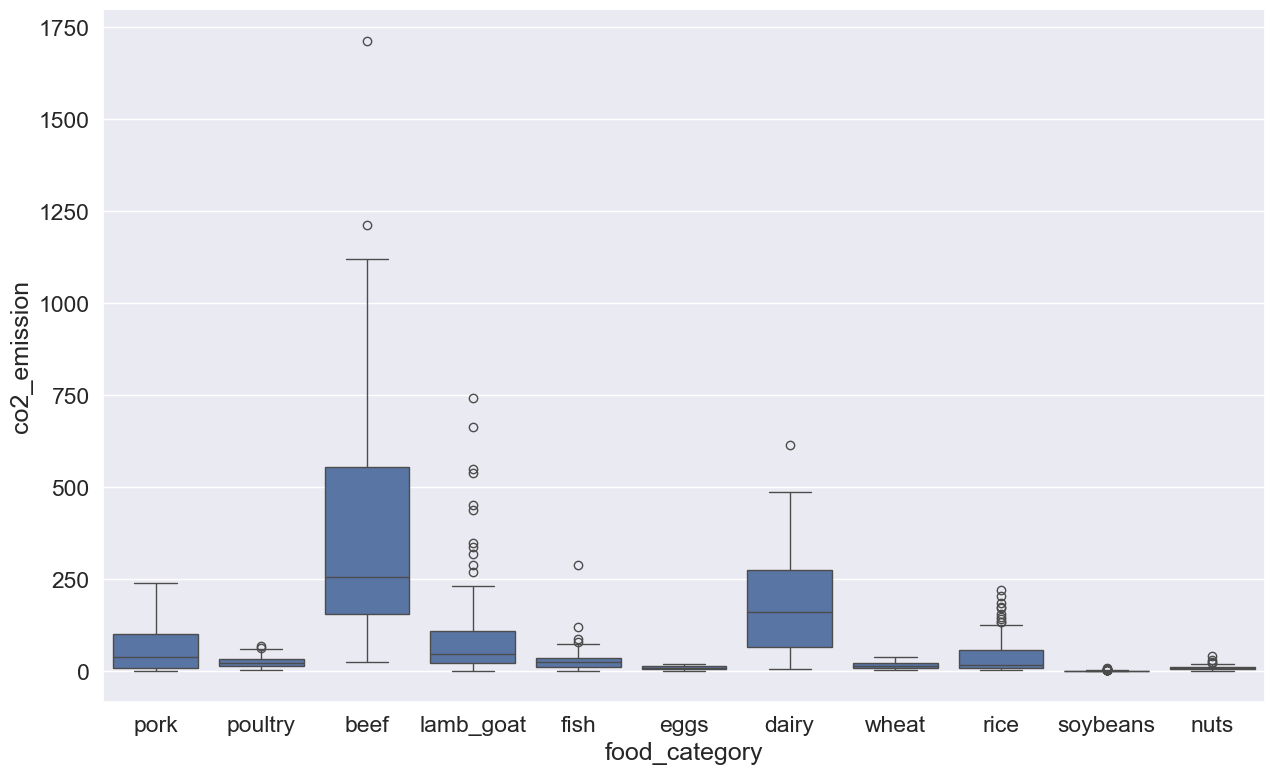

In [9]:
sns.boxplot(data=food, x="food_category", y="co2_emission")
# it's beef. IQR is basically the "height" of the boxes.

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [ ]:
# it's still beef, the median is indicated by the middle line within the boxes.

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

Excuse me while I start by just visualizing the data; I'll get to the actual task in a minute

In [88]:
# [returned_expression for iterator_var in iterable]
onlyPoultryAndFishFilter = [element in ["poultry", "fish"] for element in food["food_category"]]
onlyPoultryAndFish = food[onlyPoultryAndFishFilter]
onlyPoultryAndFish.describe()

,consumption,co2_emission
count,260.000000,260.000000
mean,19.253154,25.197615
std,17.020594,24.225642
min,0.240000,0.380000
25%,7.155000,9.667500
50%,16.565000,21.430000
75%,26.230000,33.670000
max,179.710000,286.940000


Text(53.92333333333332, 0.5, 'consumption in kg / (a*Person)')

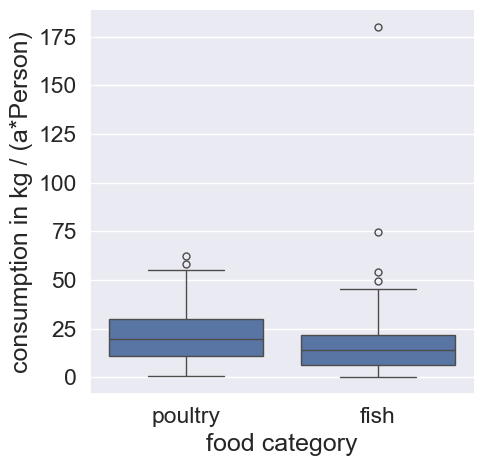

In [91]:
sns.catplot(onlyPoultryAndFish, x="food_category", y="consumption", kind="box")
plt.xlabel("food category")
plt.ylabel("consumption in kg / (a*Person)")

ok now to the permutation test;
Create a permutation test in order to assess the null hypothesis that there is no difference between the two means.

In [92]:
from scipy import stats
test = stats.permutation_test(onlyPoultryAndFish)

TypeError: permutation_test() missing 1 required positional argument: 'statistic'

### Part 2

The `distributions.csv` dataset from the `data` folder contains data drawn from 6 probability distributions – one per column. Load it to a DataFrame named `distributions` and check its contents.

1. Use the `.describe()` and `info()` methods on the `distributions` DataFrame to produce some preliminary information about each column. **What is the data type of each column?**

2. Loop through each column of `distributions` and for each column produce a plot to show the distribution.

3. Each column of the `distributions` dataframe contains data drawn from a different distribution. **Associate each column to its probability distribution.** This is the list of the probability distributions used (one for each column):
    - Bernoulli
    - Binomial
    - Continuous Uniform
    - Gaussian
    - Discrete Uniform
    - Poisson
    - Exponential (this was not explain in classroom, go by exclusion)